In [90]:
import numpy as np
import pandas as pd

In [91]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [92]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3068,ham,Ay wana meet on sat?Ì_ wkg on sat?,NaN,NaN,NaN
4729,ham,I dont know ask to my brother. Nothing problem...,NaN,NaN,NaN
5435,ham,I'm wif him now buying tix lar...,NaN,NaN,NaN
4987,ham,Which channel:-):-):):-).,NaN,NaN,NaN
4530,ham,I wish things were different. I wonder when i ...,NaN,NaN,NaN


In [93]:
df.shape

(5572, 5)

In [94]:
# 1.Data cleaning
# 2.EDA
# 3.Text preprocessing
# 4.Model building
# 5.Evalutation
# 6.Improvement
# 7.website
# 8.deploy

## 1.Data Cleaning


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [96]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [97]:
df.sample(5)

,v1,v2
4448,spam,Urgent UR awarded a complimentary trip to Euro...
3501,ham,I will come to ur home now
3120,ham,Small problem in auction:)punj now asking tiwary
4663,ham,Mum not going robinson already.
1172,ham,Happy new years melody!


In [98]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4658,ham,I cant pick the phone right now. Pls send a me...
2331,ham,At home by the way
2013,spam,Great News! Call FREEFONE 08006344447 to claim...
1121,spam,Do you want 750 anytime any network mins 150 t...
4717,ham,My uncles in Atlanta. Wish you guys a great se...


In [99]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [100]:
df['target']=encoder.fit_transform(df['target'])

In [101]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [103]:
#check for duplicate values
df.duplicated().sum()

403

In [104]:
#remove duplicate
df=df.drop_duplicates(keep='first')

In [105]:
df.duplicated().sum()

0

In [106]:
df.shape

(5169, 2)

## 2.EDA

In [107]:
#exploratory data analysis
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [108]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

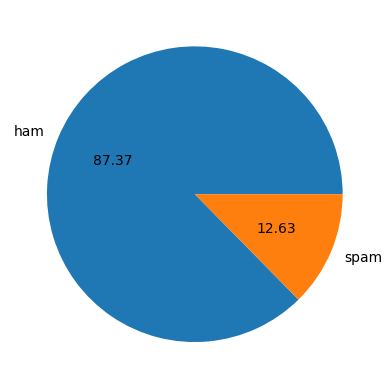

In [109]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [110]:
#data is imbalanced

In [111]:
import nltk

In [112]:
df['num_characters']=df['text'].apply(len)

In [113]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [114]:
#num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [115]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [116]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [117]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [118]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [119]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [120]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [121]:
import seaborn as sns

<AxesSubplot: xlabel='num_characters', ylabel='Count'>

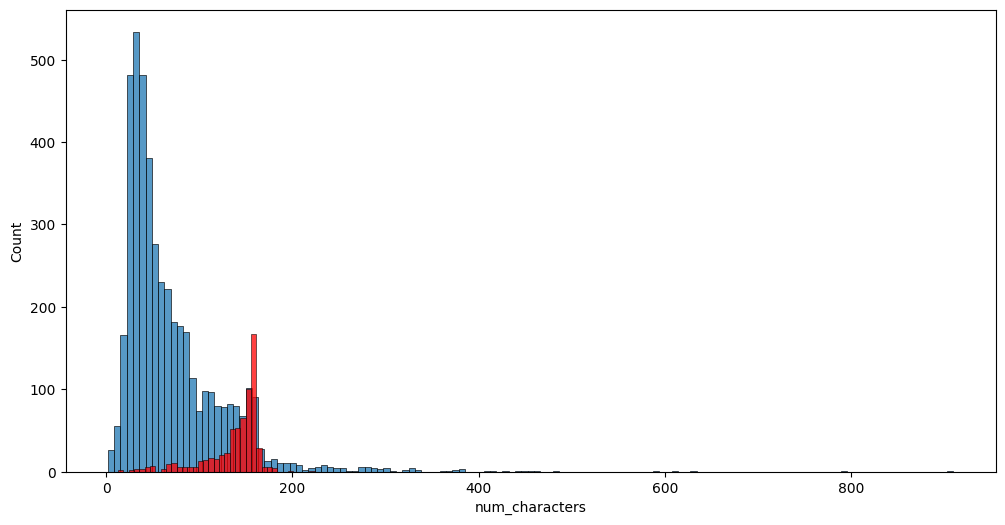

In [122]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

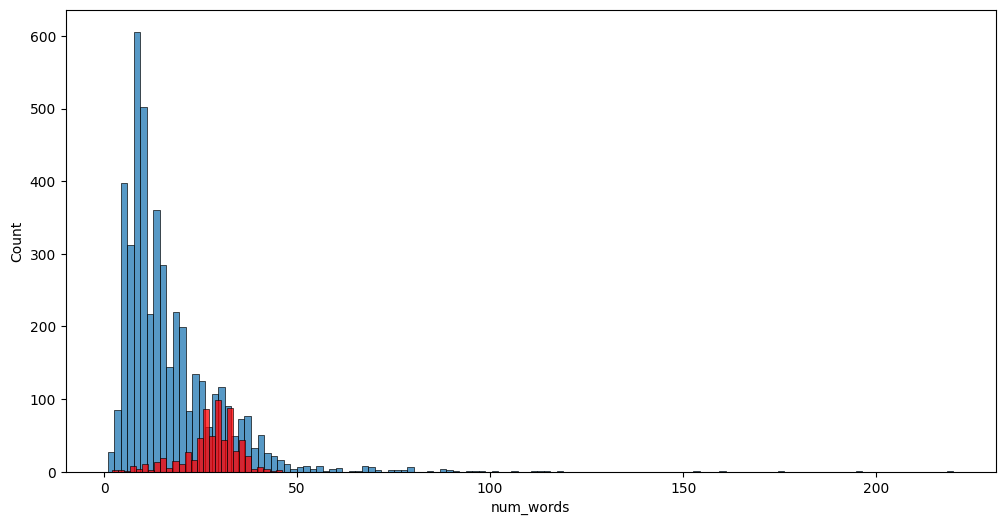

In [123]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

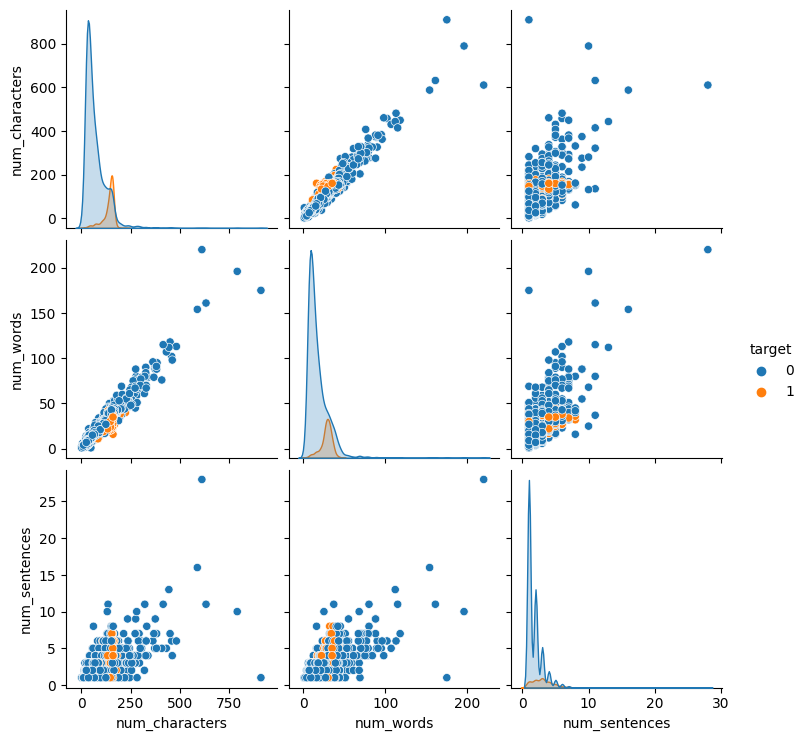

In [124]:
sns.pairplot(df,hue='target')

<AxesSubplot: >

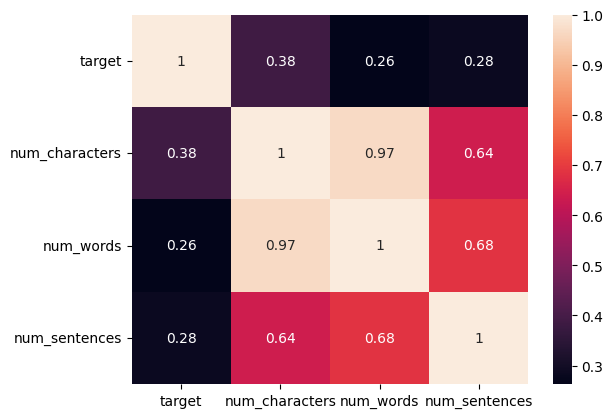

In [125]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [126]:
# we will keep only num_characters as it has high varience
# and we also can't take all  num(char,sentence) as they have high correlation

## 3. Data Preprocessing
- 1. Lower case
- 2. Tokenization
- 3. Removing special characters
- 4. Removing stop words and punctuation
- 5. Stemming


In [127]:
# this was used to download stopword
#  import nltk
#  nltk.download()

In [128]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [129]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [130]:
transform_text('I loved the YT lectures on Machine learning. How about you?')

'love yt lectur machin learn'

In [131]:
df['transformed_text']= df['text'].apply(transform_text)

In [132]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [133]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [134]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

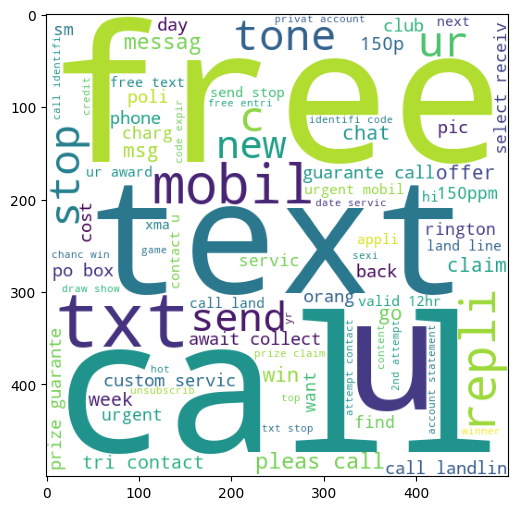

In [135]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [136]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

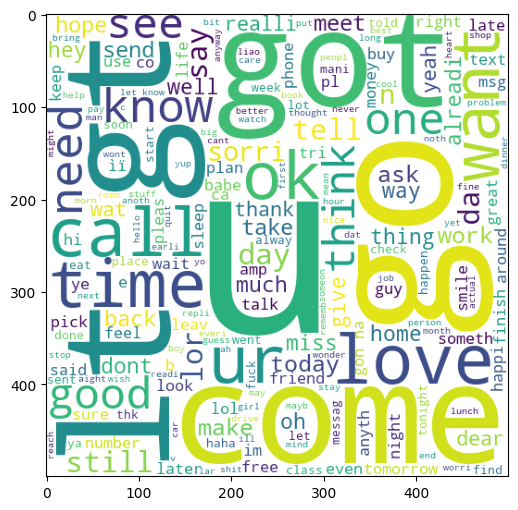

In [137]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [138]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [139]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [140]:
len(spam_corpus)

9939

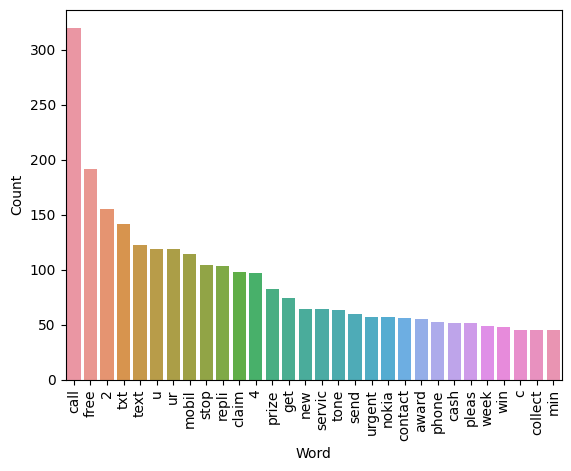

In [141]:
from collections import Counter

spam_corpus_counter = Counter(spam_corpus)
most_common_words = spam_corpus_counter.most_common(30)
nf = pd.DataFrame(most_common_words, columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=nf)
plt.xticks(rotation='vertical')
plt.show()


In [142]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [143]:
len(ham_corpus)

35394

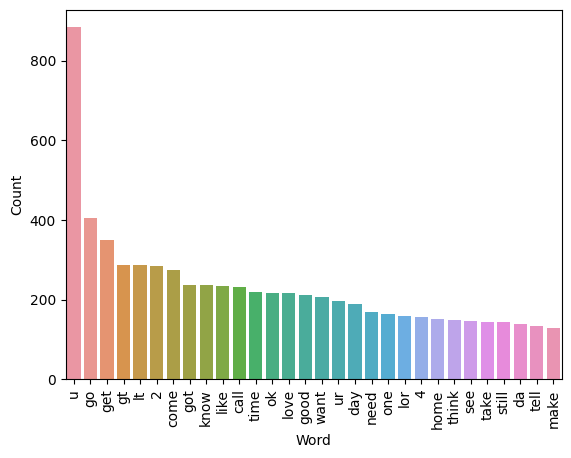

In [144]:
ham_corpus_counter = Counter(ham_corpus)
most_common_words = ham_corpus_counter.most_common(30)
nf = pd.DataFrame(most_common_words, columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=nf)
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [145]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
Tfidf=TfidfVectorizer(max_features=3000)
#countVectorizer means bag of words

In [146]:
X=Tfidf.fit_transform(df['transformed_text']).toarray()

In [147]:
X.shape

(5169, 3000)

In [148]:
y=df['target'].values

In [149]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [65]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
# we  require high precision model for work like spam detection
#since dataset is imbalance so precison matters

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [66]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# not giving any false positive know

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [67]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [68]:
# we have choosen tfidf --> MNB

In [69]:
# now trying different classifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [70]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [71]:
#dictionary of classifiers
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [72]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [73]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [74]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("for",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

for SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
for KN
Accuracy -  0.9052224371373307
Precision -  1.0
for NB
Accuracy -  0.9709864603481625
Precision -  1.0
for DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
for LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
for RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
for AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
for BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
for ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
for GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
for xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [75]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [76]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.957447,0.867188


In [77]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [78]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.957447


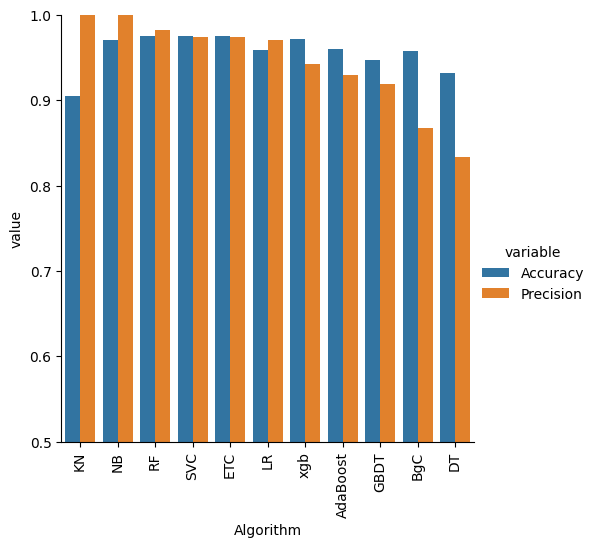

In [79]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [80]:
# model improve
# 1.change the max_features parameter of TfIdf

In [81]:
#voting classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
from sklearn.ensemble import VotingClassifier

In [82]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [83]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [84]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


# Deploying using pipeline

In [85]:
# import pickle 
# pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
# pickle.dump(mnb,open('model.pkl','wb'))

In [152]:
clfs={
    'SVC':svc,
    'NB':mnb,
    'ETC':etc,
    'vote':voting
}

In [153]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("for",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

for SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
for NB
Accuracy -  0.9709864603481625
Precision -  1.0
for ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
for vote
Accuracy -  0.9816247582205029
Precision -  0.9917355371900827


In [154]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [155]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

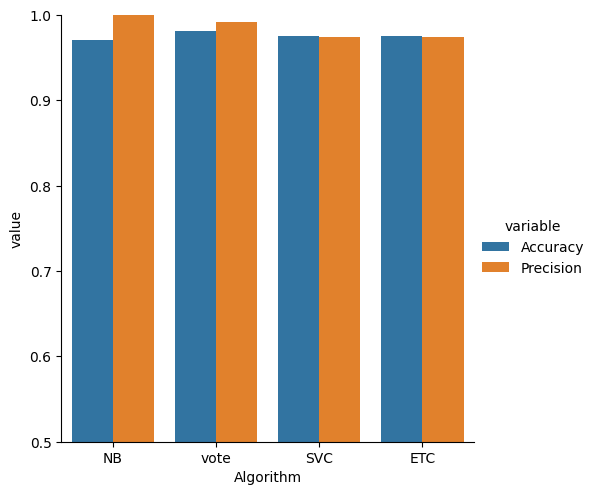

In [157]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks()
plt.show()